In [199]:
#loading required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [201]:
#loading Dataset
loan_df=pd.read_csv("loan.csv")
loan_df.head()

/var/folders/kw/57b2zkn924jd9wcwyqtrk1740000gp/T/ipykernel_90255/745593768.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df=pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [203]:
#information of dataframe
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [205]:
#checking empty columns in percantage
round((100*loan_df.isnull().sum())/len(loan_df.index))

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [207]:
#drop all the columns which contains 100% NaN Data
loan_df.dropna(axis=1,how='all',inplace=True)
round((100*loan_df.isnull().sum())/len(loan_df.index))

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [209]:
#drop columns in which NaN data is very high in percentage
loan_df.drop(labels=['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],axis=1,inplace=True)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [211]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [213]:
#check rows where it contains 100% empty data
round((100*loan_df.isnull().sum(axis=1))/len(loan_df.index))

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712    0.0
39713    0.0
39714    0.0
39715    0.0
39716    0.0
Length: 39717, dtype: float64

In [215]:
#check the unique target values
loan_df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [217]:
#drop Current loan status from the rows becuase it will not provide any past data as it is still in running mode
loan_status_list = ['Fully Paid','Charged Off']
loan_df=loan_df[loan_df['loan_status'].isin(loan_status_list)]
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [219]:
#convert loan status data into numerical data, that is Fully Paid = 0 and Charged Off = 1
loan_df['loan_status']=loan_df['loan_status'].map({'Fully Paid':0,'Charged Off':1})
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [221]:
#Extract required columns which may impact the target columns i.e. Feature selection
loan_df=loan_df.loc[:,('loan_amnt','term','int_rate','grade','emp_length',
              'home_ownership','annual_inc','issue_d','loan_status','purpose',
             'addr_state','dti')]
loan_df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti
0,5000,36 months,10.65%,B,10+ years,RENT,24000.0,Dec-11,0,credit_card,AZ,27.65
1,2500,60 months,15.27%,C,< 1 year,RENT,30000.0,Dec-11,1,car,GA,1.00
2,2400,36 months,15.96%,C,10+ years,RENT,12252.0,Dec-11,0,small_business,IL,8.72
3,10000,36 months,13.49%,C,10+ years,RENT,49200.0,Dec-11,0,other,CA,20.00
5,5000,36 months,7.90%,A,3 years,RENT,36000.0,Dec-11,0,wedding,AZ,11.20


In [223]:
#create new column from the existing column
loan_df['year'] = loan_df['issue_d'].apply(lambda x:x.split('-')[1])
loan_df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,year
0,5000,36 months,10.65%,B,10+ years,RENT,24000.0,Dec-11,0,credit_card,AZ,27.65,11
1,2500,60 months,15.27%,C,< 1 year,RENT,30000.0,Dec-11,1,car,GA,1.00,11
2,2400,36 months,15.96%,C,10+ years,RENT,12252.0,Dec-11,0,small_business,IL,8.72,11
3,10000,36 months,13.49%,C,10+ years,RENT,49200.0,Dec-11,0,other,CA,20.00,11
5,5000,36 months,7.90%,A,3 years,RENT,36000.0,Dec-11,0,wedding,AZ,11.20,11


In [225]:
#convert the data type from string to int and check the type
loan_df['year']=loan_df['year'].astype(int)
type(loan_df['year'][0])

numpy.int64

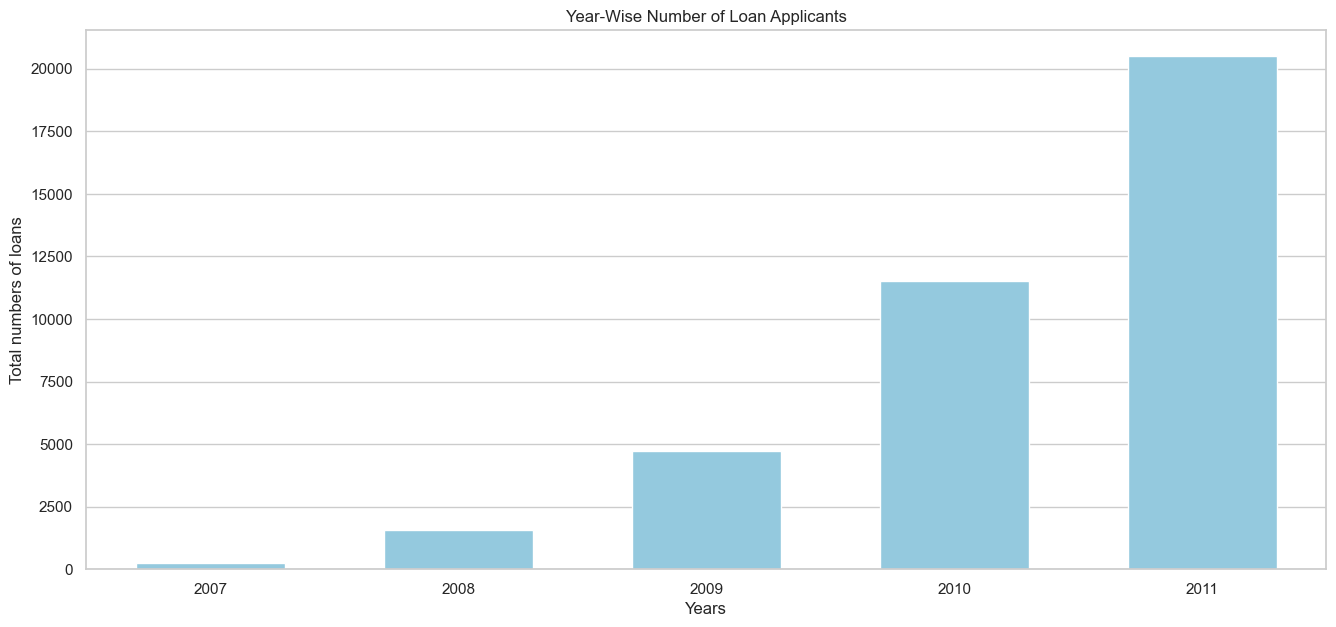

In [227]:
# Set the figure size
plt.figure(figsize=(16,7))

# Set the seaborn style
sb.set(style="whitegrid")

# Draw the countplot with custom color and width
ax = sb.countplot(x='year', data=loan_df, color='skyblue', width=0.6)

# Define the years and their positions
years = ['2007', '2008', '2009', '2010', '2011']
xpos = np.arange(len(years))

# Set labels and title
ax.set(xlabel='Years', ylabel='Total numbers of loans', title='Year-Wise Number of Loan Applicants')

# Set custom x-ticks
plt.xticks(xpos, years)

# Show the plot
plt.show()

### In this univariate analysis , We shown substantial growth between 2007-2011 in the number of loan applicants

In [230]:
#change the type of int_rate column from string to float
loan_df['int_rate']=loan_df['int_rate'].str.replace('%','')
loan_df['int_rate']=loan_df['int_rate'].astype(float)
type(loan_df['int_rate'][0])

numpy.float64

In [232]:
#create new column from the existing column
loan_df['month'] = loan_df['issue_d'].apply(lambda x:x.split('-')[0])
loan_df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,year,month
0,5000,36 months,10.65,B,10+ years,RENT,24000.0,Dec-11,0,credit_card,AZ,27.65,11,Dec
1,2500,60 months,15.27,C,< 1 year,RENT,30000.0,Dec-11,1,car,GA,1.00,11,Dec
2,2400,36 months,15.96,C,10+ years,RENT,12252.0,Dec-11,0,small_business,IL,8.72,11,Dec
3,10000,36 months,13.49,C,10+ years,RENT,49200.0,Dec-11,0,other,CA,20.00,11,Dec
5,5000,36 months,7.90,A,3 years,RENT,36000.0,Dec-11,0,wedding,AZ,11.20,11,Dec


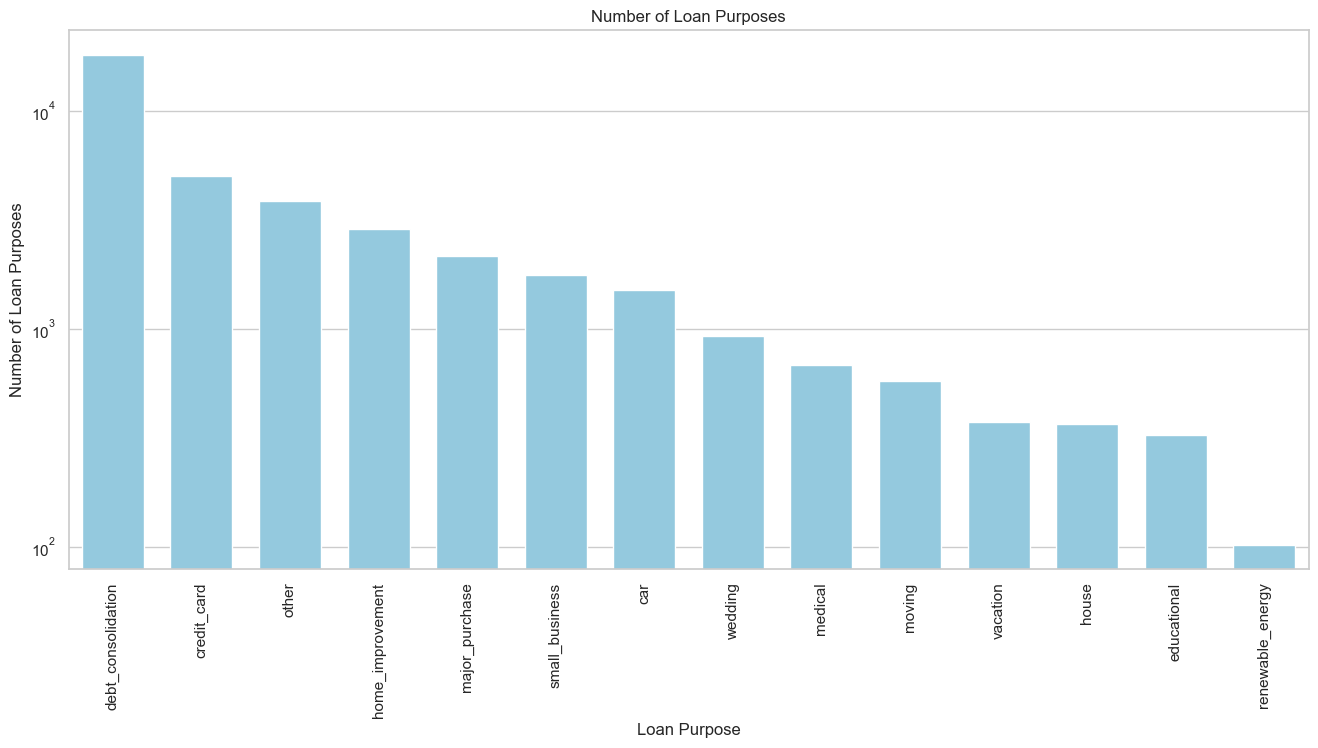

In [234]:
# Set the figure size
plt.figure(figsize=(16,7))

# Draw the countplot with custom color and width
ax = sb.countplot(x='purpose', data=loan_df, order=loan_df['purpose'].value_counts().index, color='skyblue', width=0.7)

# Set labels and title
ax.set(xlabel='Loan Purpose', ylabel='Number of Loan Purposes', title='Number of Loan Purposes')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set y-axis to logarithmic scale
plt.yscale('log')

# Show the plot
plt.show()

### The five major purposes of Loan applications  are - ‘debt_consolidation’ , ‘credit_card’ , ‘other’ , ‘home_improvement’ & ‘major_purchase’

### highest number of loan application purpose is for debt_consolidation.


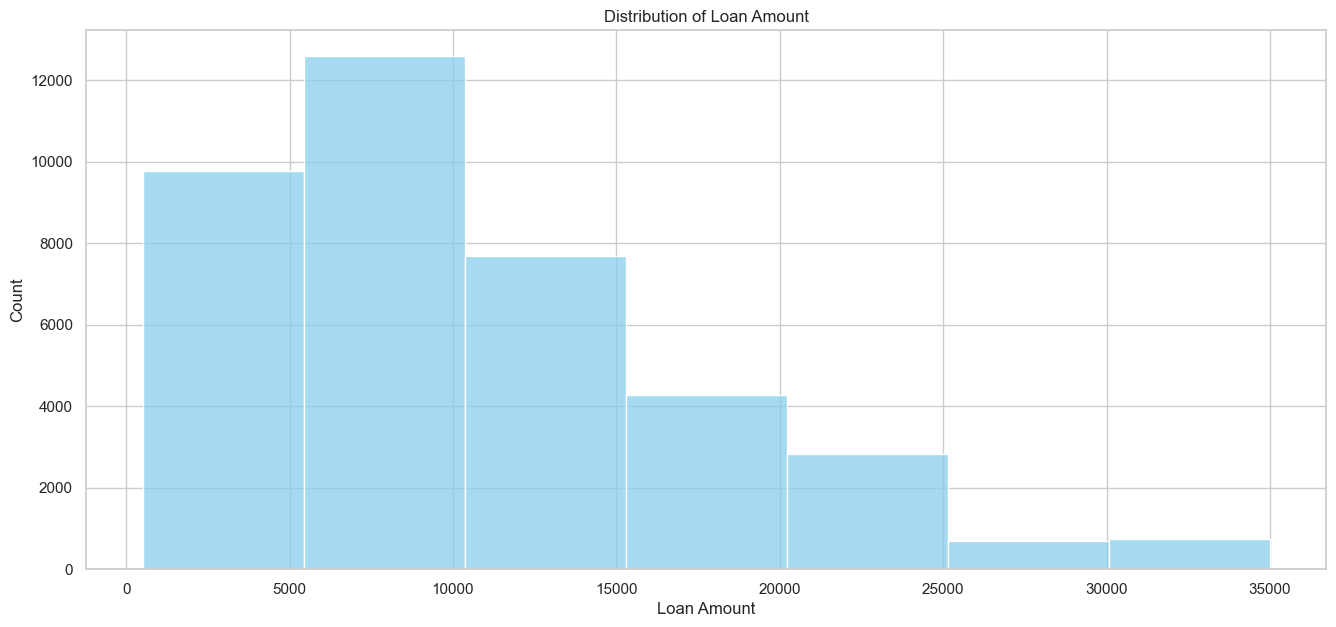

In [237]:
# Set the figure size
plt.figure(figsize=(16,7))

# Draw the histogram with custom color and number of bins
ax = sb.histplot(loan_df['loan_amnt'], bins=7, color='skyblue')

# Set labels and title
ax.set(xlabel='Loan Amount', title='Distribution of Loan Amount')

# Show the plot
plt.show()

### The distribution of loan amount,that is the amount of loan applied can be visualized from the above plot . It has been observed that the maximum loan which is applied, range amount is between 5000-10000


In [240]:
#create a separate dataframe of defaulters
defaulters_df=loan_df.loc[loan_df['loan_status']==1]
defaulters_df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,year,month
1,2500,60 months,15.27,C,< 1 year,RENT,30000.0,Dec-11,1,car,GA,1.00,11,Dec
8,5600,60 months,21.28,F,4 years,OWN,40000.0,Dec-11,1,small_business,CA,5.55,11,Dec
9,5375,60 months,12.69,B,< 1 year,RENT,15000.0,Dec-11,1,other,TX,18.08,11,Dec
12,9000,36 months,13.49,C,< 1 year,RENT,30000.0,Dec-11,1,debt_consolidation,VA,10.08,11,Dec
14,10000,36 months,10.65,B,3 years,RENT,100000.0,Dec-11,1,other,CA,7.06,11,Dec


In [242]:
#calculate the % of loan defaulters according to grade
grade_df=pd.DataFrame(data=round((100*defaulters_df['grade'].value_counts())/loan_df['grade'].value_counts(),2))
grade_df.rename(columns={'grade':'defaulter_perc'},inplace=True)
grade_df

,count
grade,
A,5.99
B,12.21
C,17.19
D,21.99
E,26.85
F,32.68
G,33.78


### The percentage of Defaulters is the highest in Grade G followed by Grade F 

In [249]:
#calculate the % of loan defaulters according to loan purpose
purpose_df=pd.DataFrame(data=round((100*defaulters_df['purpose'].value_counts())/loan_df['purpose'].value_counts(),2))
purpose_df.rename(columns={'purpose':'defaulter_perc'},inplace=True)
purpose_df.sort_values(by='count',ascending=False,inplace=True)
purpose_df

,count
purpose,
small_business,27.08
renewable_energy,18.63
educational,17.23
other,16.38
house,16.08
moving,15.97
medical,15.57
debt_consolidation,15.33
vacation,14.13


### Highest number of defaulters are for productive and purposeful reasons like business, Renewal enery, education etc. Whereas major purchanse, wedding, car etc has less defaulters

In [275]:
#verifying the columns
print(grade_df.columns)

Index(['count'], dtype='object')


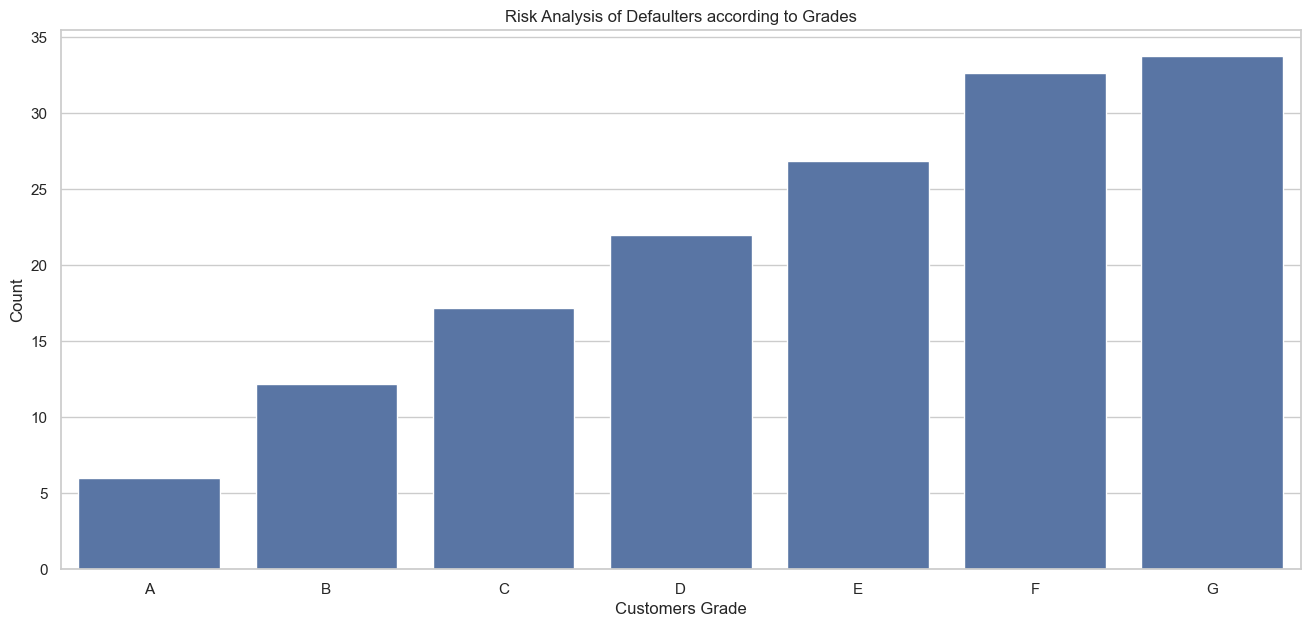

In [283]:
import matplotlib.ticker as mtick

plt.figure(figsize=(16,7))
ax = sb.barplot(x=grade_df.index, y='count', data=grade_df)
ax.set(xlabel='Customers Grade', ylabel='Count', title='Risk Analysis of Defaulters according to Grades')

# If you calculate 'defaulter_perc', use that instead of 'count'
# ax.set(xlabel='Customer Grade', ylabel='Percentage of Defaulters', title='Risk Analysis of Defaulters acc. to Grades')
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

### The percentage of risk of Defaulters is the largest in the Loan Purpose – ‘small business’ followed by ‘renewable_energy’ & ‘educational’ so on.

In [288]:
import pandas as pd

# Calculate the percentage of loan defaulters according to Employee experience
defaulters_count = defaulters_df['emp_length'].value_counts()
total_count = loan_df['emp_length'].value_counts()
percentage = round((100 * defaulters_count) / total_count, 2)

# Create the DataFrame
emp_df = pd.DataFrame(percentage)

# Rename the column from 'count' to 'defaulter_perc'
emp_df.rename(columns={emp_df.columns[0]: 'defaulter_perc'}, inplace=True)

# Sort the DataFrame by 'defaulter_perc'
emp_df.sort_values(by='defaulter_perc', ascending=False, inplace=True)

# Display the DataFrame
print(emp_df)


            defaulter_perc
emp_length                
10+ years            15.68
7 years              15.37
1 year               14.39
5 years              14.34
< 1 year             14.17
6 years              14.16
8 years              14.15
3 years              13.83
4 years              13.82
2 years              13.21
9 years              12.89


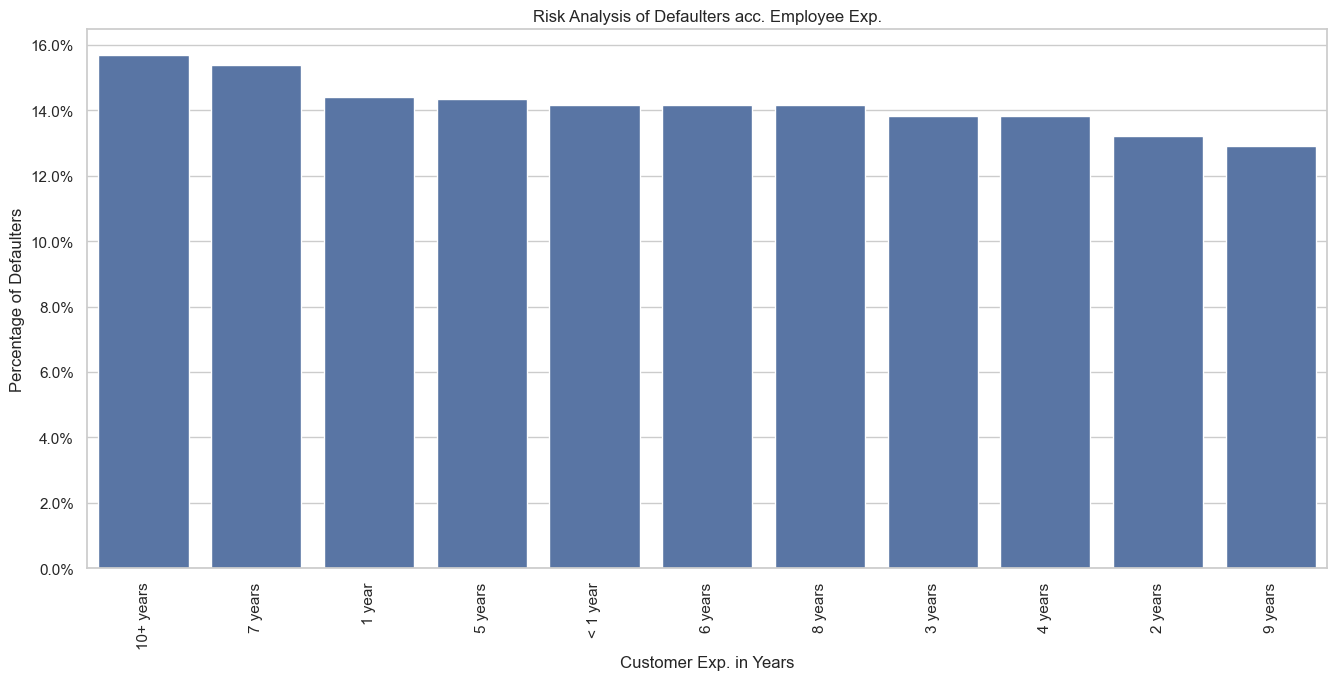

In [290]:
import matplotlib.ticker as mtick
plt.figure(figsize=(16,7))
ax=sb.barplot(x=emp_df.index,y='defaulter_perc',data=emp_df)
ax.set(xlabel='Customer Exp. in Years', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. Employee Exp.')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)
plt.show()

### The percentage of risk of Defaulters is maximum for cutomers with Employment experience - 10+ years & minimum for 9 year’s experience. No specific pattern observed

In [296]:
import pandas as pd

# Calculate the percentage of loan defaulters by home ownership
defaulter_counts = defaulters_df['home_ownership'].value_counts()
total_counts = loan_df['home_ownership'].value_counts()
percentage_defaulters = (100 * defaulter_counts / total_counts).round(2)

# Convert to DataFrame
home_df = percentage_defaulters.reset_index()
home_df.columns = ['home_ownership', 'defaulter_perc']

# Sort the DataFrame by percentage of defaulters
home_df.sort_values(by='defaulter_perc', ascending=False, inplace=True)

# Drop any rows with NaN values
home_df.dropna(inplace=True)

# Display the DataFrame
print(home_df)


  home_ownership  defaulter_perc
2          OTHER           18.37
4           RENT           15.36
3            OWN           14.89
0       MORTGAGE           13.67


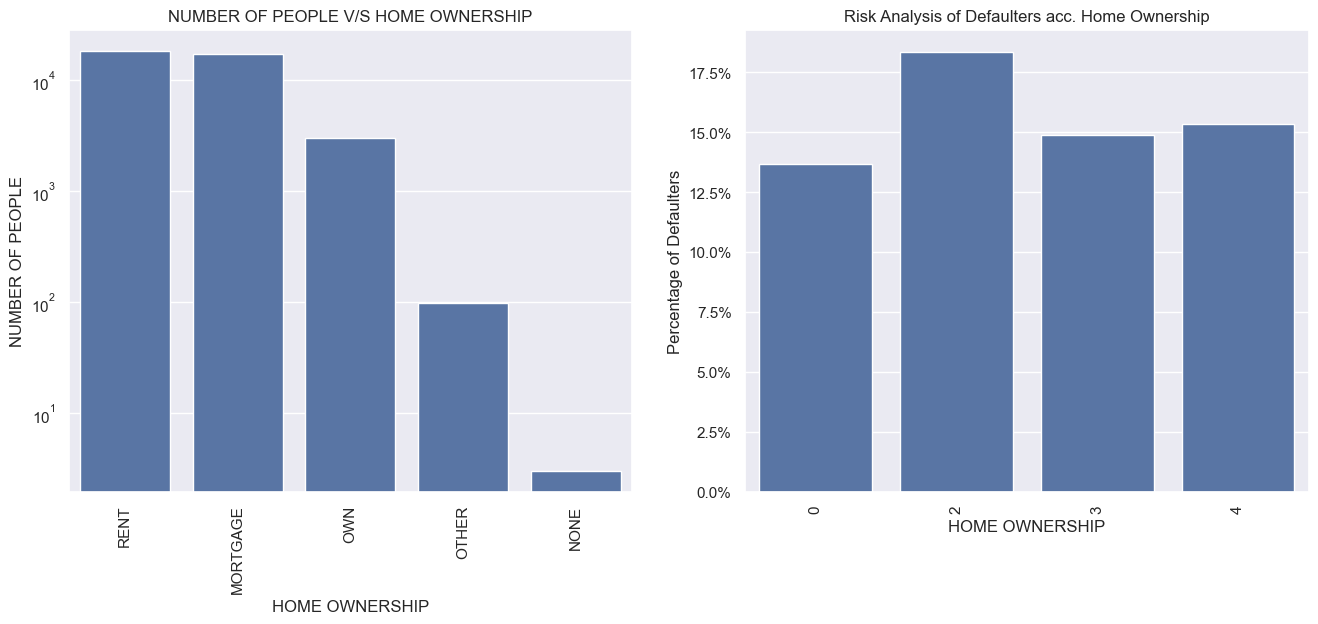

In [298]:
sb.set(style="darkgrid")
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
ax = sb.countplot(x='home_ownership',data=loan_df,order=loan_df['home_ownership'].value_counts().index)
ax.set(xlabel='HOME OWNERSHIP', ylabel='NUMBER OF PEOPLE',title='NUMBER OF PEOPLE V/S HOME OWNERSHIP')
plt.xticks(rotation=90)
plt.yscale('log')
plt.subplot(1, 2, 2)
#plt.pie(home_df['defaulter_perc'], labels = home_df.index,autopct='%.2f%%')
ax=sb.barplot(x=home_df.index,y='defaulter_perc',data=home_df)
ax.set(xlabel='HOME OWNERSHIP', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. Home Ownership')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)
plt.show()

### 1. The number of people who have home ownership -  “Rent” 
### 2. The percentage of defaulter under home ownership is  “Other” followed by “Rent” and “Own” and “Mortgage”

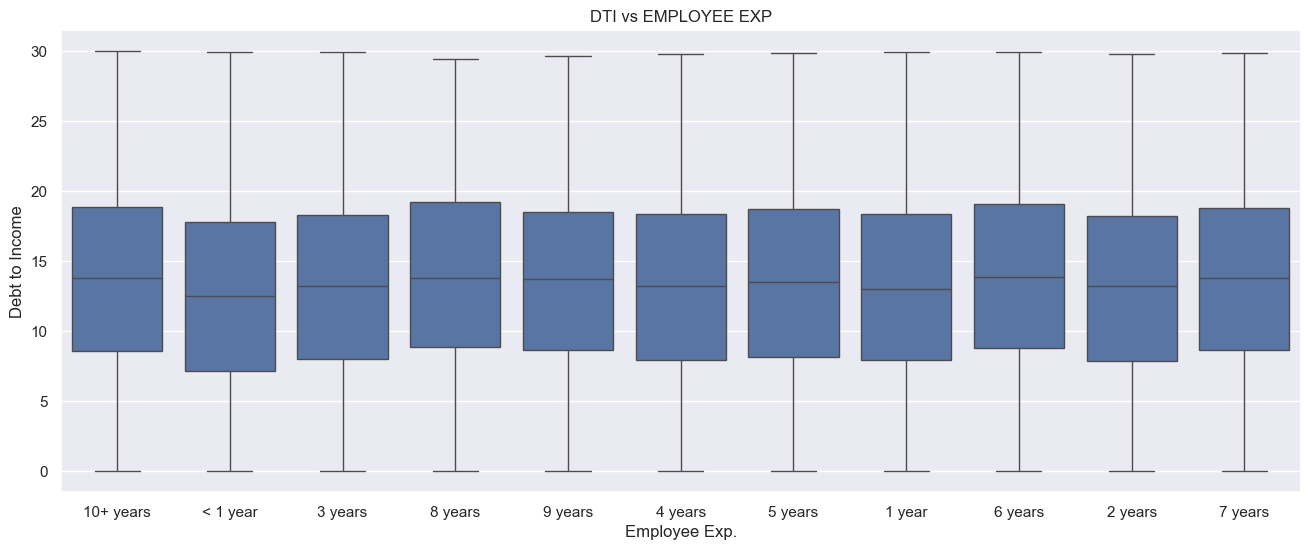

In [304]:
plt.figure(figsize=(16,6))
ax=sb.boxplot(x='emp_length',y='dti',data=loan_df)
ax.set(xlabel='Employee Exp.', ylabel='Debt to Income',title='DTI vs EMPLOYEE EXP')
plt.show()

### By doing bivariate analysis it has been observed that  10+ years of employee exp. Is having debt to income in maximum range  apart from that rest year of employee exp. are more or less in same range.

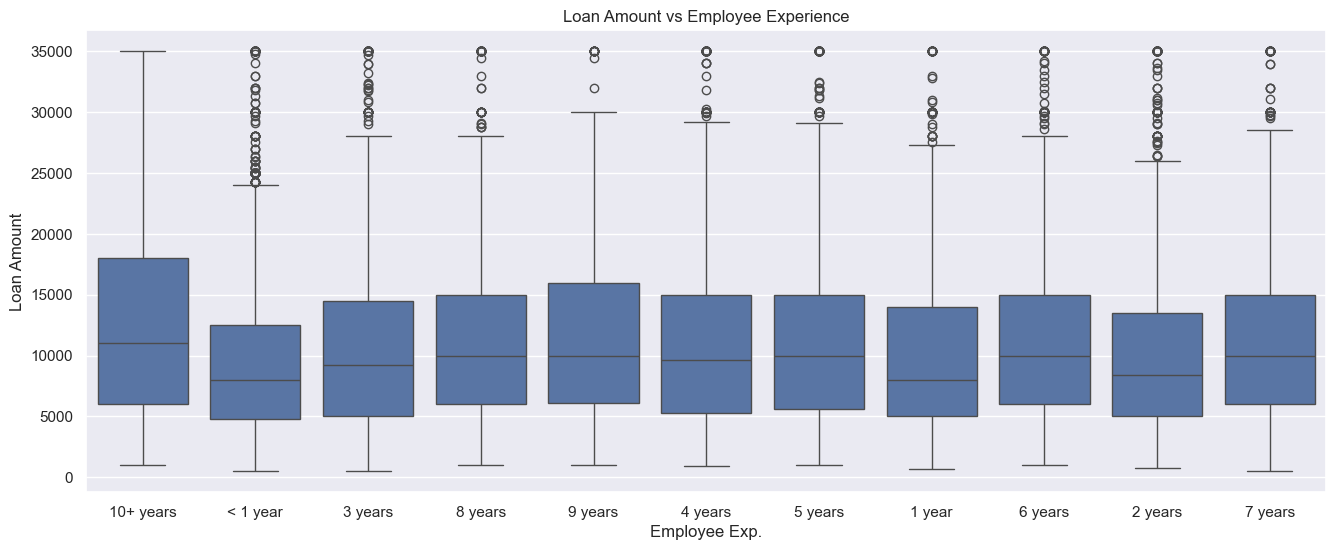

In [308]:
plt.figure(figsize=(16,6))
ax=sb.boxplot(x='emp_length',y='loan_amnt',data=loan_df)
ax.set(xlabel='Employee Exp.', ylabel='Loan Amount',title='Loan Amount vs Employee Experience')
plt.show()

### By doing bivariate analysis it has been observed that the employee exp. With 10+ years is taking more amount of loan and those who are less than 1 year is taken less amount of loan.

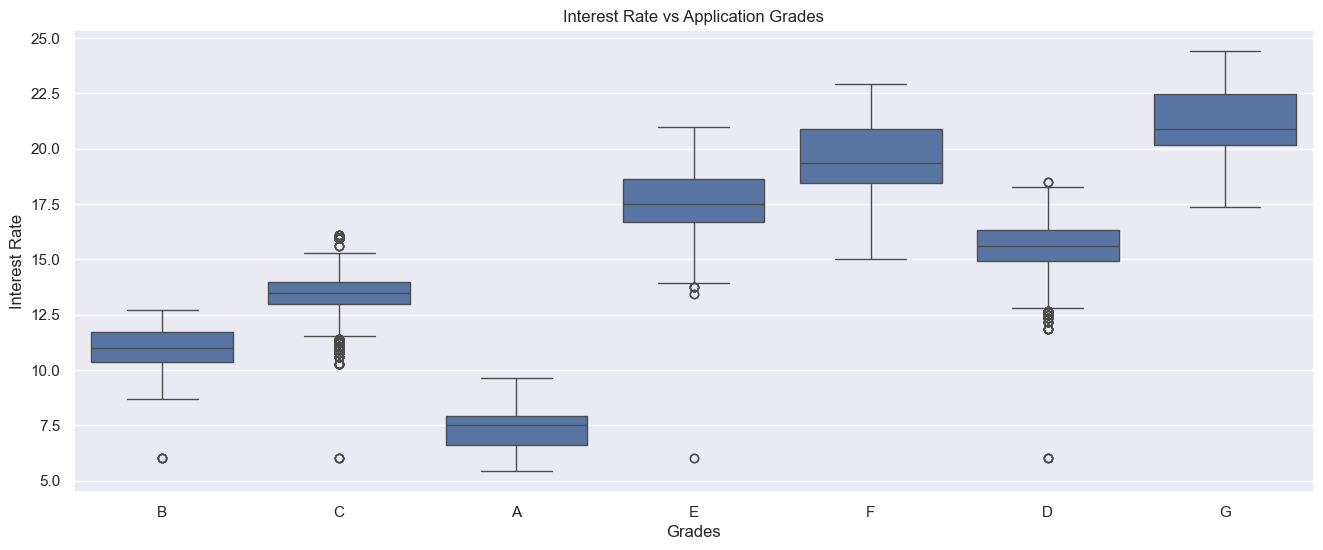

In [313]:
plt.figure(figsize=(16,6))
ax=sb.boxplot(x='grade',y='int_rate',data=loan_df,)
ax.set(xlabel='Grades', ylabel='Interest Rate',title='Interest Rate vs Application Grades')
plt.show()

### From the above plot it has been visualize that based on grade interest rate is going higher – “A”  is having minimum interest rate, whereas “B” is having higher interest rate.

In [333]:
grade_group = loan_df.groupby('grade')
grade_group['int_rate'].median()

grade
A     7.49
B    10.99
C    13.49
D    15.62
E    17.51
F    19.36
G    20.90
Name: int_rate, dtype: float64

In [331]:
emp_group = loan_df.groupby('emp_length')
emp_group['loan_amnt'].median()

emp_length
1 year        8000.0
10+ years    11000.0
2 years       8400.0
3 years       9225.0
4 years       9600.0
5 years      10000.0
6 years      10000.0
7 years      10000.0
8 years      10000.0
9 years      10000.0
< 1 year      8000.0
Name: loan_amnt, dtype: float64

In [323]:
#calculate the percentage of loan defaulters according to address of a state
import pandas as pd

# Calculate the percentage of loan defaulters by state
defaulter_counts = defaulters_df['addr_state'].value_counts()
total_counts = loan_df['addr_state'].value_counts()
percentage_defaulters = (100 * defaulter_counts / total_counts).round(2)

# Convert to DataFrame
state_df = percentage_defaulters.reset_index()
state_df.columns = ['addr_state', 'defaulter_perc']

# Sort the DataFrame by percentage of defaulters
state_df.sort_values(by='defaulter_perc', ascending=False, inplace=True)

# Select the top 10 states
state_df = state_df.head(10)

# Display the DataFrame
print(state_df)


   addr_state  defaulter_perc
28         NE           60.00
32         NV           22.55
40         SD           19.35
0          AK           19.23
9          FL           18.12
24         MO           17.01
11         HI           16.87
13         ID           16.67
31         NM           16.39
36         OR           16.32


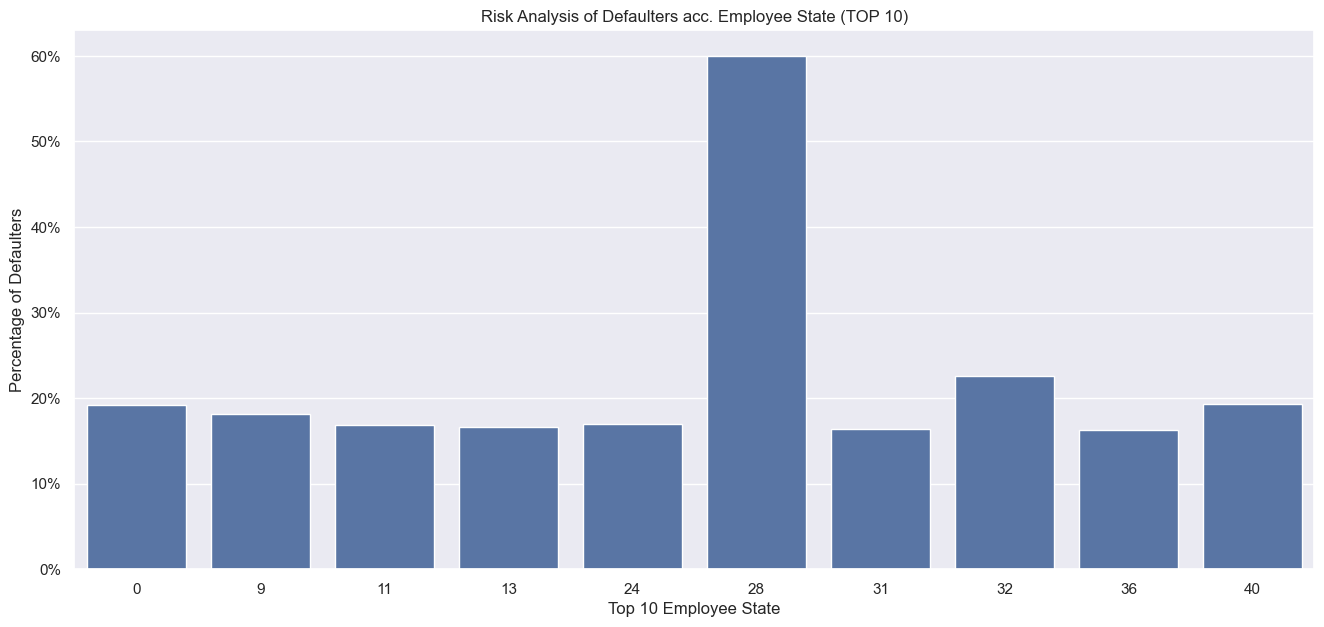

In [325]:
import matplotlib.ticker as mtick
plt.figure(figsize=(16,7))
ax=sb.barplot(x=state_df.index,y='defaulter_perc',data=state_df)
ax.set(xlabel='Top 10 Employee State', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. Employee State (TOP 10)')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

### The percentage of  Defaulters is maximum from NE (address) which is 60% 

In [339]:
#calculate the percentage of loan defaulters according to term
term_df=pd.DataFrame(data=round((100*defaulters_df['term'].value_counts())/loan_df['term'].value_counts(),2))
term_df.rename(columns={'term':'defaulter_perc'},inplace=True)
term_df.sort_values(by='count',ascending=False,inplace=True)
term_df

,count
term,
60 months,25.31
36 months,11.09


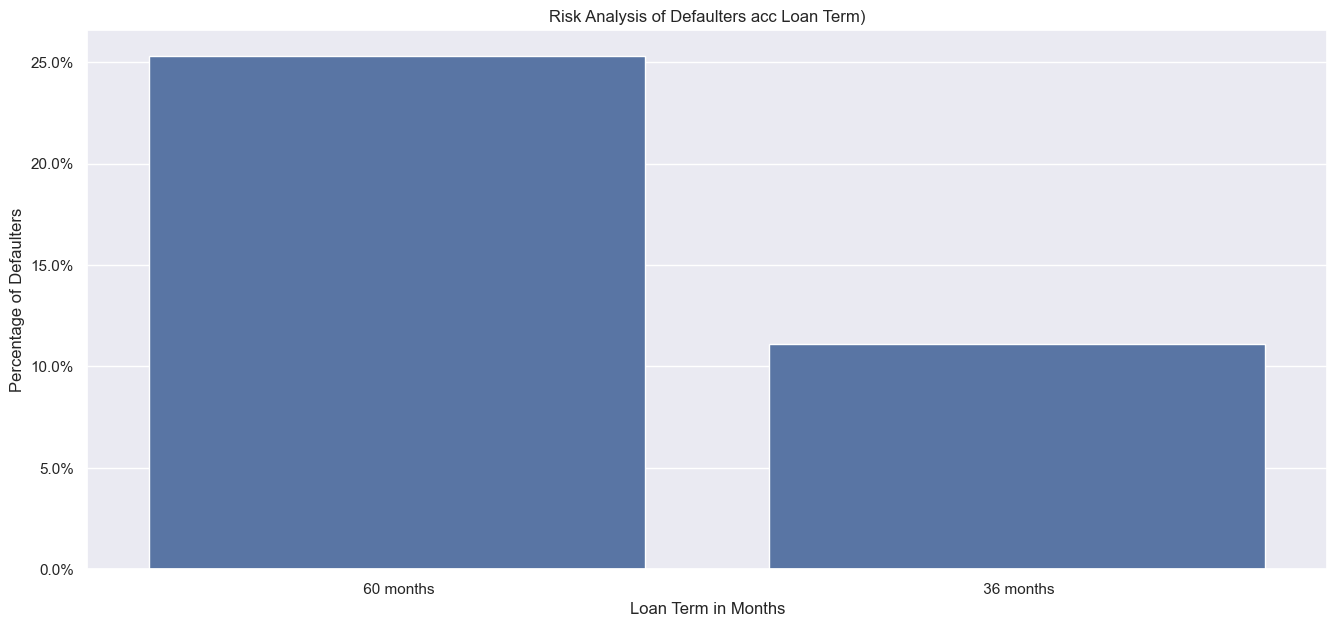

In [347]:
import matplotlib.ticker as mtick
plt.figure(figsize=(16,7))
ax=sb.barplot(x=term_df.index,y='count',data=term_df)
ax.set(xlabel='Loan Term in Months', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc Loan Term)')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

### The percentage of Defaulters is found in 60 months as compared to 36 months – Loan Term